### Loading the requisite libraries

In [1]:
import numpy as np 
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import plotly.express as px
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

### Data Loading

In [2]:
# Read CSV train data file into DataFrame
combined_df=pd.read_excel('C:\\Users\\dicks\\Documents\\Millennial.xlsx', sheet_name=None)
combined_df.keys()

dict_keys(['Do the Right Thing Millennials', 'Tech Geek Millennials', 'Millennial Moms', 'Environmental Millennials', "Don't Call Me a Millennial", 'Millennials in Name Only'])

In [4]:
df = pd.concat(combined_df, ignore_index=True)
df.head(10)

Date     House      Show     Trump    Health    Coffee  Democratic  \
0 2019-04-12  0.490849  0.066962  0.000000  0.074879  0.000000    0.000000   
1 2019-04-13  0.518731  0.033481  0.057609  0.037440  0.000000    0.000000   
2 2019-04-15  0.422310  0.022321  0.218276  0.024960  0.000000    0.036290   
3 2019-04-16  0.441433  0.016740  0.163707  0.018720  0.000000    0.027217   
4 2019-04-17  0.449186  0.013392  0.130966  0.014976  0.018474    0.021774   
5 2019-04-18  0.374322  0.011160  0.124708  0.012480  0.015395    0.018145   
6 2019-04-19  0.380020  0.009566  0.122166  0.010697  0.013196    0.015553   
7 2019-04-21  0.332518  0.008370  0.106895  0.025947  0.011546    0.013609   
8 2019-04-22  0.340598  0.007440  0.095018  0.023064  0.010264    0.012097   
9 2019-04-24  0.377364  0.006696  0.085516  0.020757  0.009237    0.010887   

   Democrat  Charity  Party  ...  Worker  Job  Representative  School  Police  \
0  0.000000      0.0    0.0  ...     NaN  NaN             NaN     NaN     NaN   
1  0.000000      0.0    0.0  ...     NaN  NaN             NaN     NaN     NaN   
2  0.116935      0.0    0.0  ...     NaN  NaN             NaN     NaN     NaN   
3  0.087701      0.0    0.0  ...     NaN  NaN             NaN     NaN     NaN   
4  0.070161      0.0    0.0  ...     NaN  NaN             NaN     NaN     NaN   
5  0.058467      0.0    0.0  ...     NaN  NaN             NaN     NaN     NaN   
6  0.050115      0.0    0.0  ...     NaN  NaN             NaN     NaN     NaN   
7  0.043851      0.0    0.0  ...     NaN  NaN             NaN     NaN     NaN   
8  0.038978      0.0    0.0  ...     NaN  NaN             NaN     NaN     NaN   
9  0.035080      0.0    0.0  ...     NaN  NaN             NaN     NaN     NaN   

   Ireland  Irish  Heat  Man  Iowa  
0      NaN    NaN   NaN  NaN   NaN  
1      NaN    NaN   NaN  NaN   NaN  
2      NaN    NaN   NaN  NaN   NaN  
3      NaN    NaN   NaN  NaN   NaN  
4      NaN    NaN   NaN  NaN   NaN  
5      NaN    NaN   NaN  NaN   NaN  
6      NaN    NaN   NaN  NaN   NaN  
7      NaN    NaN   NaN  NaN   NaN  
8      NaN    NaN   NaN  NaN   NaN  
9      NaN    NaN   NaN  NaN   NaN  

[10 rows x 146 columns]

In [5]:
df.describe()

House         Show        Trump      Health      Coffee  \
count  1769.000000  1769.000000  1769.000000  296.000000  296.000000   
mean      0.079233     0.097925     0.145966    0.098730    0.158680   
std       0.093492     0.031132     0.077057    0.047697    0.107343   
min       0.000000     0.000000     0.000000    0.010697    0.000000   
25%       0.025029     0.082909     0.087799    0.069044    0.058176   
50%       0.044328     0.103364     0.144120    0.095353    0.165314   
75%       0.069789     0.121427     0.190375    0.136093    0.252805   
max       0.518731     0.236195     0.388155    0.186510    0.335184   

        Democratic     Democrat     Charity        Party   Republican  ...  \
count  1472.000000  1769.000000  296.000000  1769.000000  1769.000000  ...   
mean      0.086198     0.082466    0.108351     0.056241     0.113760  ...   
std       0.059123     0.048740    0.067907     0.034947     0.073920  ...   
min       0.000000     0.000000    0.000000     0.000000     0.000000  ...   
25%       0.038253     0.045034    0.056320     0.027578     0.060693  ...   
50%       0.086036     0.077230    0.096830     0.054332     0.093303  ...   
75%       0.118974     0.114281    0.173693     0.074240     0.160907  ...   
max       0.279816     0.225639    0.217138     0.183978     0.601113  ...   

           Worker         Job  Representative      School      Police  \
count  294.000000  294.000000      294.000000  589.000000  295.000000   
mean     0.028696    0.027845        0.022682    0.022943    0.031661   
std      0.015822    0.016590        0.016580    0.016852    0.018311   
min      0.000000    0.000000        0.000000    0.000000    0.004483   
25%      0.018003    0.014179        0.012155    0.011433    0.016525   
50%      0.030393    0.027264        0.019093    0.019050    0.028357   
75%      0.041203    0.042264        0.028605    0.030153    0.046705   
max      0.060329    0.060102        0.071922    0.081897    0.085545   

          Ireland       Irish        Heat         Man        Iowa  
count  295.000000  295.000000  295.000000  295.000000  295.000000  
mean     0.024566    0.022929    0.022265    0.014055    0.026528  
std      0.016568    0.015644    0.017688    0.007209    0.057812  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.009013    0.007767    0.003611    0.009057    0.002135  
50%      0.027363    0.022847    0.021096    0.013714    0.005505  
75%      0.035946    0.032725    0.038413    0.019249    0.014747  
max      0.061362    0.077643    0.058285    0.031105    0.238982  

[8 rows x 144 columns]

TypeError: 'tuple' object is not callable

In [6]:
df.tail(5)

Date     House      Show     Trump  Health  Coffee  Democratic  \
1764 2020-02-27  0.037395  0.114527  0.284212     NaN     NaN    0.223334   
1765 2020-02-28  0.035252  0.115204  0.270284     NaN     NaN    0.216074   
1766 2020-02-29  0.032119  0.114359  0.259920     NaN     NaN    0.208009   
1767 2020-03-01  0.028890  0.117643  0.247984     NaN     NaN    0.202956   
1768 2020-03-02  0.027158  0.117075  0.237449     NaN     NaN    0.198817   

      Democrat  Charity     Party  ...  Worker  Job  Representative    School  \
1764  0.172388      NaN  0.182837  ...     NaN  NaN             NaN  0.005604   
1765  0.163246      NaN  0.183048  ...     NaN  NaN             NaN  0.005604   
1766  0.154799      NaN  0.179299  ...     NaN  NaN             NaN  0.005604   
1767  0.148126      NaN  0.174279  ...     NaN  NaN             NaN  0.004326   
1768  0.141880      NaN  0.174154  ...     NaN  NaN             NaN  0.004326   

        Police   Ireland     Irish      Heat       Man      Iowa  
1764  0.043640  0.052716  0.066132  0.009339  0.015617  0.209592  
1765  0.047071  0.055041  0.072120  0.012278  0.015617  0.204630  
1766  0.049988  0.057610  0.077643  0.012278  0.014443  0.197528  
1767  0.053579  0.061362  0.077643  0.012278  0.017825  0.189543  
1768  0.054184  0.061362  0.077643  0.012278  0.020762  0.185285  

[5 rows x 146 columns]

In [63]:
print('The number of millenials in the data is {}.'.format(df.shape[0]))

The number of millenials in the data is 1769.


In [64]:
print('The number of word features in the data is {}.'.format(df.shape[1]))

The number of word features in the data is 146.


In [8]:
#Testing for any missing data in the dataframe columns
df.isnull().sum()

Date          0
House         0
Show          0
Trump         0
Health     1473
           ... 
Ireland    1474
Irish      1474
Heat       1474
Man        1474
Iowa       1474
Length: 146, dtype: int64

In [9]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    return ms

In [10]:
missingdata(df)

Total    Percent
User         1477  83.493499
Holiday      1477  83.493499
Sale         1477  83.493499
Gamer        1477  83.493499
Hotel        1477  83.493499
...           ...        ...
Child         587  33.182589
Company       297  16.789146
Democratic    297  16.789146
American      292  16.506501
New York      292  16.506501

[138 rows x 2 columns]

###### As we observe, the dataframe contains no null values

In [24]:
df.describe()

House         Show        Trump      Health      Coffee  \
count  1769.000000  1769.000000  1769.000000  296.000000  296.000000   
mean      0.079233     0.097925     0.145966    0.098730    0.158680   
std       0.093492     0.031132     0.077057    0.047697    0.107343   
min       0.000000     0.000000     0.000000    0.010697    0.000000   
25%       0.025029     0.082909     0.087799    0.069044    0.058176   
50%       0.044328     0.103364     0.144120    0.095353    0.165314   
75%       0.069789     0.121427     0.190375    0.136093    0.252805   
max       0.518731     0.236195     0.388155    0.186510    0.335184   

        Democratic     Democrat     Charity        Party   Republican  ...  \
count  1472.000000  1769.000000  296.000000  1769.000000  1769.000000  ...   
mean      0.086198     0.082466    0.108351     0.056241     0.113760  ...   
std       0.059123     0.048740    0.067907     0.034947     0.073920  ...   
min       0.000000     0.000000    0.000000     0.000000     0.000000  ...   
25%       0.038253     0.045034    0.056320     0.027578     0.060693  ...   
50%       0.086036     0.077230    0.096830     0.054332     0.093303  ...   
75%       0.118974     0.114281    0.173693     0.074240     0.160907  ...   
max       0.279816     0.225639    0.217138     0.183978     0.601113  ...   

           Worker         Job  Representative      School      Police  \
count  294.000000  294.000000      294.000000  589.000000  295.000000   
mean     0.028696    0.027845        0.022682    0.022943    0.031661   
std      0.015822    0.016590        0.016580    0.016852    0.018311   
min      0.000000    0.000000        0.000000    0.000000    0.004483   
25%      0.018003    0.014179        0.012155    0.011433    0.016525   
50%      0.030393    0.027264        0.019093    0.019050    0.028357   
75%      0.041203    0.042264        0.028605    0.030153    0.046705   
max      0.060329    0.060102        0.071922    0.081897    0.085545   

          Ireland       Irish        Heat         Man        Iowa  
count  295.000000  295.000000  295.000000  295.000000  295.000000  
mean     0.024566    0.022929    0.022265    0.014055    0.026528  
std      0.016568    0.015644    0.017688    0.007209    0.057812  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.009013    0.007767    0.003611    0.009057    0.002135  
50%      0.027363    0.022847    0.021096    0.013714    0.005505  
75%      0.035946    0.032725    0.038413    0.019249    0.014747  
max      0.061362    0.077643    0.058285    0.031105    0.238982  

[8 rows x 144 columns]

In [11]:
clean_df=df.fillna(0)
clean_df.head(10)

Date     House      Show     Trump    Health    Coffee  Democratic  \
0 2019-04-12  0.490849  0.066962  0.000000  0.074879  0.000000    0.000000   
1 2019-04-13  0.518731  0.033481  0.057609  0.037440  0.000000    0.000000   
2 2019-04-15  0.422310  0.022321  0.218276  0.024960  0.000000    0.036290   
3 2019-04-16  0.441433  0.016740  0.163707  0.018720  0.000000    0.027217   
4 2019-04-17  0.449186  0.013392  0.130966  0.014976  0.018474    0.021774   
5 2019-04-18  0.374322  0.011160  0.124708  0.012480  0.015395    0.018145   
6 2019-04-19  0.380020  0.009566  0.122166  0.010697  0.013196    0.015553   
7 2019-04-21  0.332518  0.008370  0.106895  0.025947  0.011546    0.013609   
8 2019-04-22  0.340598  0.007440  0.095018  0.023064  0.010264    0.012097   
9 2019-04-24  0.377364  0.006696  0.085516  0.020757  0.009237    0.010887   

   Democrat  Charity  Party  ...  Worker  Job  Representative  School  Police  \
0  0.000000      0.0    0.0  ...     0.0  0.0             0.0     0.0     0.0   
1  0.000000      0.0    0.0  ...     0.0  0.0             0.0     0.0     0.0   
2  0.116935      0.0    0.0  ...     0.0  0.0             0.0     0.0     0.0   
3  0.087701      0.0    0.0  ...     0.0  0.0             0.0     0.0     0.0   
4  0.070161      0.0    0.0  ...     0.0  0.0             0.0     0.0     0.0   
5  0.058467      0.0    0.0  ...     0.0  0.0             0.0     0.0     0.0   
6  0.050115      0.0    0.0  ...     0.0  0.0             0.0     0.0     0.0   
7  0.043851      0.0    0.0  ...     0.0  0.0             0.0     0.0     0.0   
8  0.038978      0.0    0.0  ...     0.0  0.0             0.0     0.0     0.0   
9  0.035080      0.0    0.0  ...     0.0  0.0             0.0     0.0     0.0   

   Ireland  Irish  Heat  Man  Iowa  
0      0.0    0.0   0.0  0.0   0.0  
1      0.0    0.0   0.0  0.0   0.0  
2      0.0    0.0   0.0  0.0   0.0  
3      0.0    0.0   0.0  0.0   0.0  
4      0.0    0.0   0.0  0.0   0.0  
5      0.0    0.0   0.0  0.0   0.0  
6      0.0    0.0   0.0  0.0   0.0  
7      0.0    0.0   0.0  0.0   0.0  
8      0.0    0.0   0.0  0.0   0.0  
9      0.0    0.0   0.0  0.0   0.0  

[10 rows x 146 columns]

### Exploratory Data Analysis

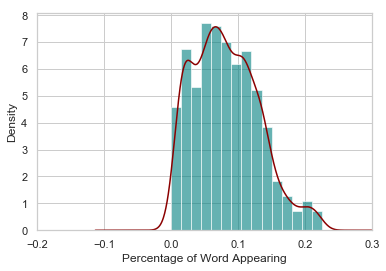

In [14]:
# let's expore the distribution of the 
ax = clean_df["Democrat"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
clean_df["Democrat"].plot(kind='density', color='darkred')
ax.set(xlabel='Percentage of Word Appearing')
plt.xlim(-0.2,0.3)
plt.show()

ValueError: num must be 1 <= num <= 60, not 61

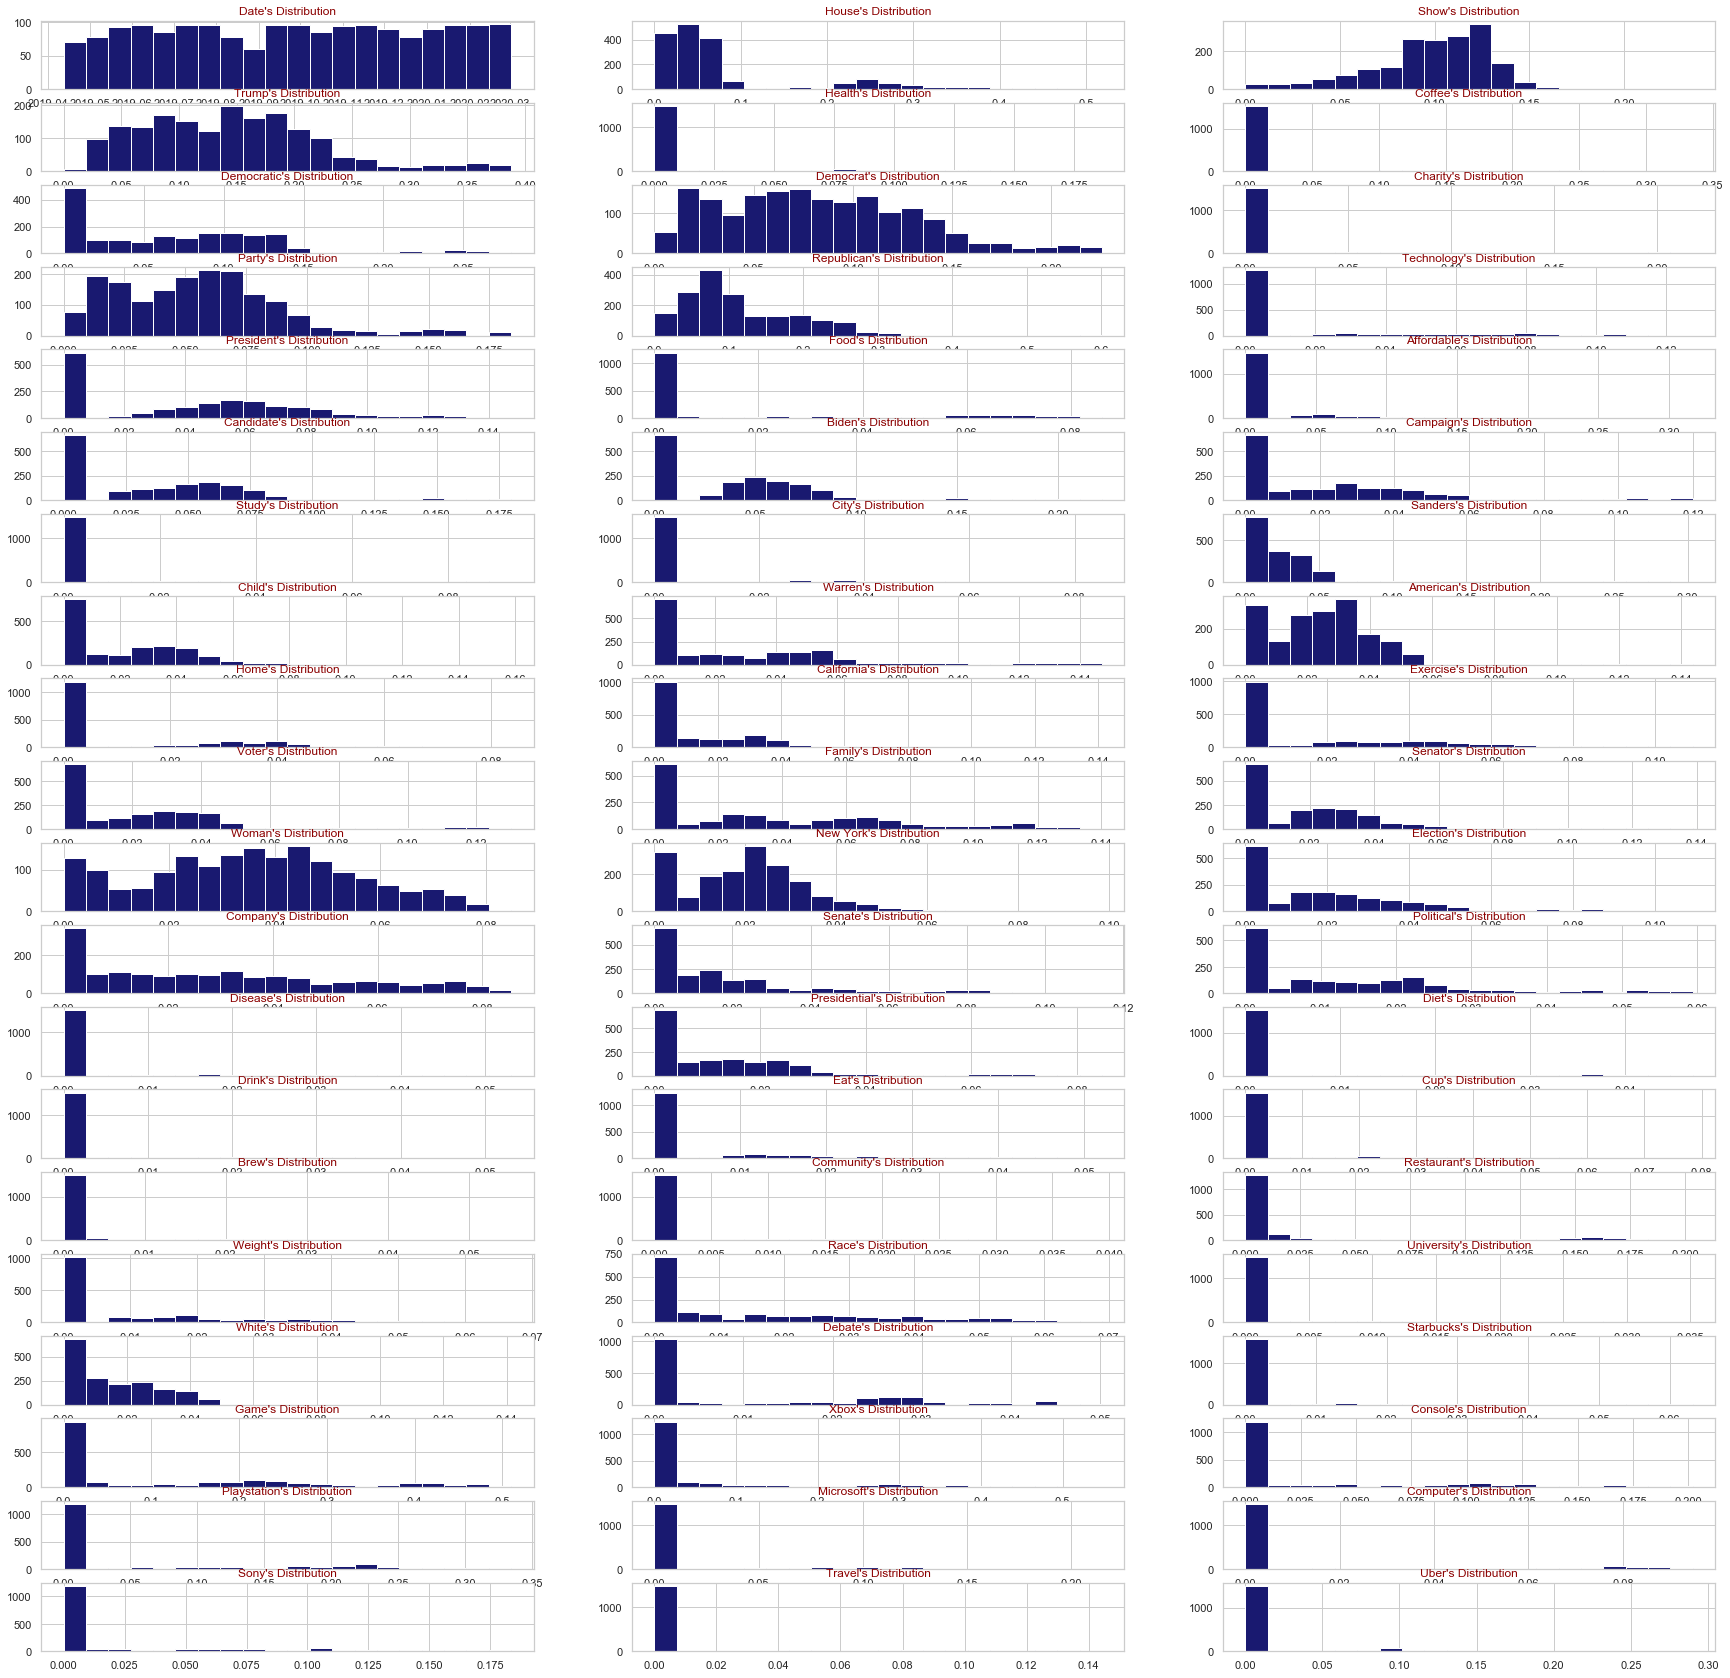

In [27]:
#Function to plot the distribution of the dataframe features
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+"'s Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(clean_df,clean_df.columns,20,3)

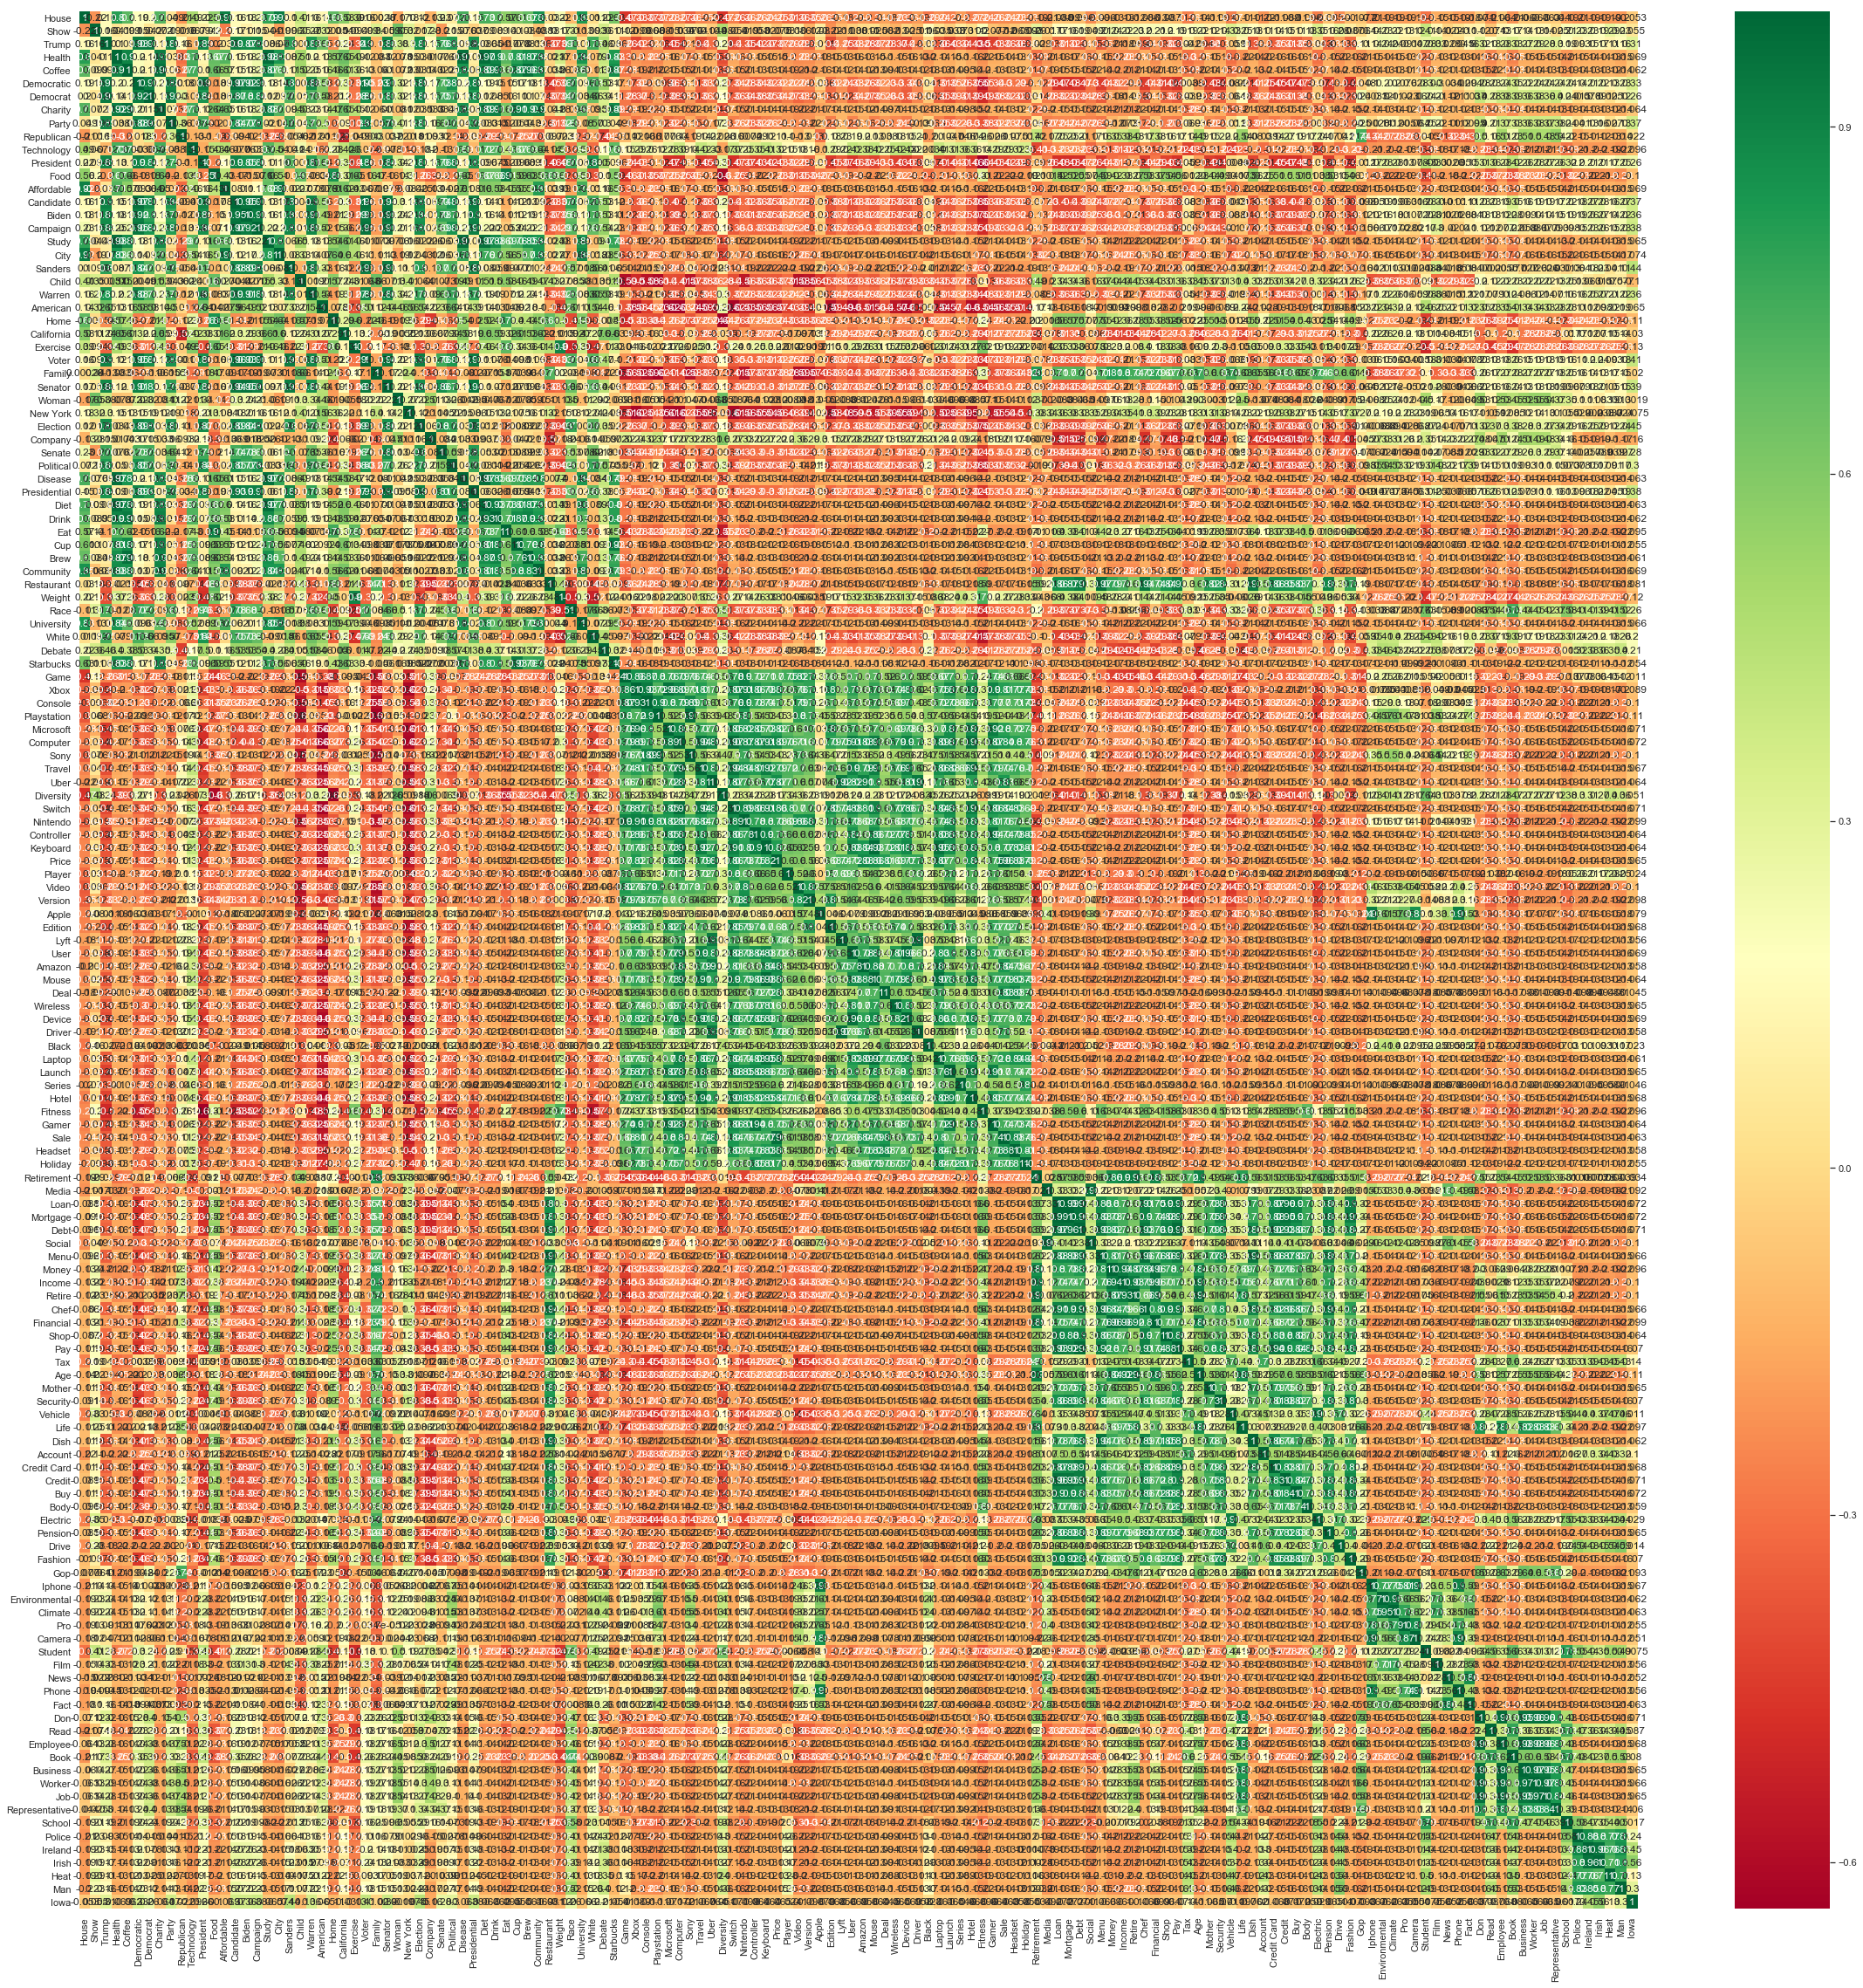

In [46]:
plt.subplots(figsize=(40, 40))
sns.heatmap(clean_df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [30]:
clean_df.shape

(1769, 146)

In [31]:
import pycaret
from pycaret.clustering import *

In [36]:
exp_clu101 = setup(clean_df,
                   ignore_features = ['Date'],
                   session_id = 123)


Setup Succesfully Completed!


In [37]:
kmeans = create_model('kmeans')

In [38]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)


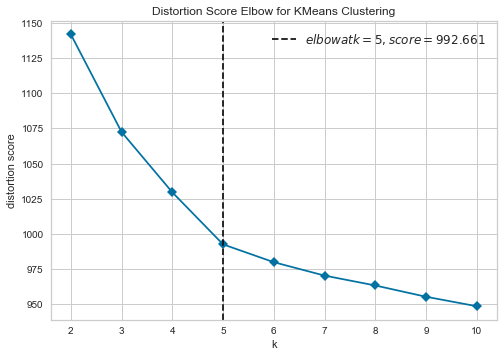

In [65]:
plot_model(kmeans, plot = 'elbow')

In [66]:
kmeans = create_model('kmeans', num_clusters = 5)

In [67]:
kmean_results = assign_model(kmeans)
kmean_results.head()

Date     House      Show     Trump    Health    Coffee  Democratic  \
0 2019-04-12  0.490849  0.066962  0.000000  0.074879  0.000000    0.000000   
1 2019-04-13  0.518731  0.033481  0.057609  0.037440  0.000000    0.000000   
2 2019-04-15  0.422310  0.022321  0.218276  0.024960  0.000000    0.036290   
3 2019-04-16  0.441433  0.016740  0.163707  0.018720  0.000000    0.027217   
4 2019-04-17  0.449186  0.013392  0.130966  0.014976  0.018474    0.021774   

   Democrat  Charity  Party  ...  Job  Representative  School  Police  \
0  0.000000      0.0    0.0  ...  0.0             0.0     0.0     0.0   
1  0.000000      0.0    0.0  ...  0.0             0.0     0.0     0.0   
2  0.116935      0.0    0.0  ...  0.0             0.0     0.0     0.0   
3  0.087701      0.0    0.0  ...  0.0             0.0     0.0     0.0   
4  0.070161      0.0    0.0  ...  0.0             0.0     0.0     0.0   

   Ireland  Irish  Heat  Man  Iowa    Cluster  
0      0.0    0.0   0.0  0.0   0.0  Cluster 4  
1      0.0    0.0   0.0  0.0   0.0  Cluster 4  
2      0.0    0.0   0.0  0.0   0.0  Cluster 4  
3      0.0    0.0   0.0  0.0   0.0  Cluster 4  
4      0.0    0.0   0.0  0.0   0.0  Cluster 4  

[5 rows x 147 columns]

In [69]:
plot_model(kmeans)

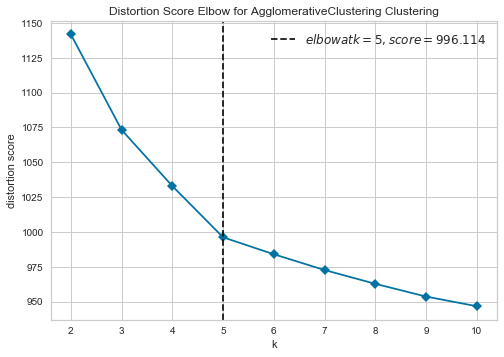

In [54]:
plot_model(kmodes, plot = 'elbow')

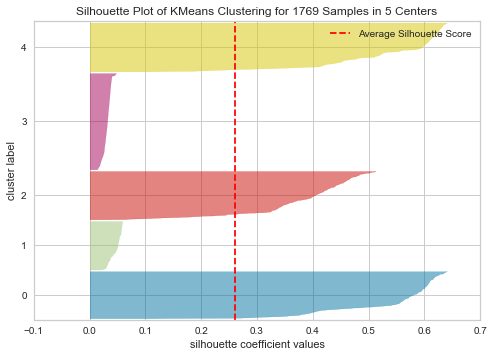

In [70]:
plot_model(kmeans, plot = 'silhouette')